In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error , r2_score
import math
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('Clean_data.csv')

In [3]:
df.head(5)

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,2014-05-02 00:00:00,313000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2,2014-05-02 00:00:00,342000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2,3,2014-05-02 00:00:00,420000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
3,4,2014-05-02 00:00:00,550000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
4,5,2014-05-02 00:00:00,490000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


In [4]:
df = df.drop('Unnamed: 0',axis= 1)

In [5]:
df = df.drop('view', axis = 1)

In [6]:
df = df.drop('waterfront', axis = 1)

In [7]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')

In [8]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
df = df[df['price'] > 0]
df.shape

(3292, 16)

In [41]:
df.describe().style.background_gradient(cmap='flag')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000
mean,449931.545869,3.258202,1.998177,1837.526428,7026.441373,1.492254,3.447752,1603.224180,234.302248,1970.448056,808.058931
std,190013.004743,0.766697,0.645730,619.737708,3419.743020,0.545848,0.666974,614.044801,355.111691,30.280488,979.222959
min,7800.000000,2.000000,1.000000,580.000000,681.000000,1.000000,1.000000,580.000000,0.000000,1900.000000,0.000000
25%,303427.500000,3.000000,1.500000,1360.000000,4613.750000,1.000000,3.000000,1130.000000,0.000000,1950.000000,0.000000
50%,417125.000000,3.000000,2.000000,1780.000000,7034.500000,1.500000,3.000000,1440.000000,0.000000,1973.000000,0.000000
75%,561000.000000,4.000000,2.500000,2257.750000,9053.000000,2.000000,4.000000,1980.000000,490.000000,1998.000000,1999.000000
max,1150000.000000,5.000000,3.500000,3910.000000,18362.000000,3.500000,5.000000,3340.000000,1250.000000,2014.000000,2014.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3292 entries, 0 to 3313
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3292 non-null   object 
 1   price          3292 non-null   int64  
 2   bedrooms       3292 non-null   float64
 3   bathrooms      3292 non-null   float64
 4   sqft_living    3292 non-null   int64  
 5   sqft_lot       3292 non-null   int64  
 6   floors         3292 non-null   float64
 7   condition      3292 non-null   int64  
 8   sqft_above     3292 non-null   int64  
 9   sqft_basement  3292 non-null   int64  
 10  yr_built       3292 non-null   int64  
 11  yr_renovated   3292 non-null   int64  
 12  street         3292 non-null   object 
 13  city           3292 non-null   object 
 14  statezip       3292 non-null   object 
 15  country        3292 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory usage: 437.2+ KB


In [10]:
numeric = df.select_dtypes(include='number')
numeric

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005
1,342000,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0
2,420000,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0
3,550000,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992
4,490000,2.0,1.00,880,6380,1.0,3,880,0,1938,1994
...,...,...,...,...,...,...,...,...,...,...,...
3309,308166,3.0,1.75,1510,6360,1.0,4,1510,0,1954,1979
3310,534333,3.0,2.50,1460,7573,2.0,3,1460,0,1983,2009
3311,416904,3.0,2.50,3010,7014,2.0,3,3010,0,2009,0
3312,203400,4.0,2.00,2090,6630,1.0,3,1070,1020,1974,0


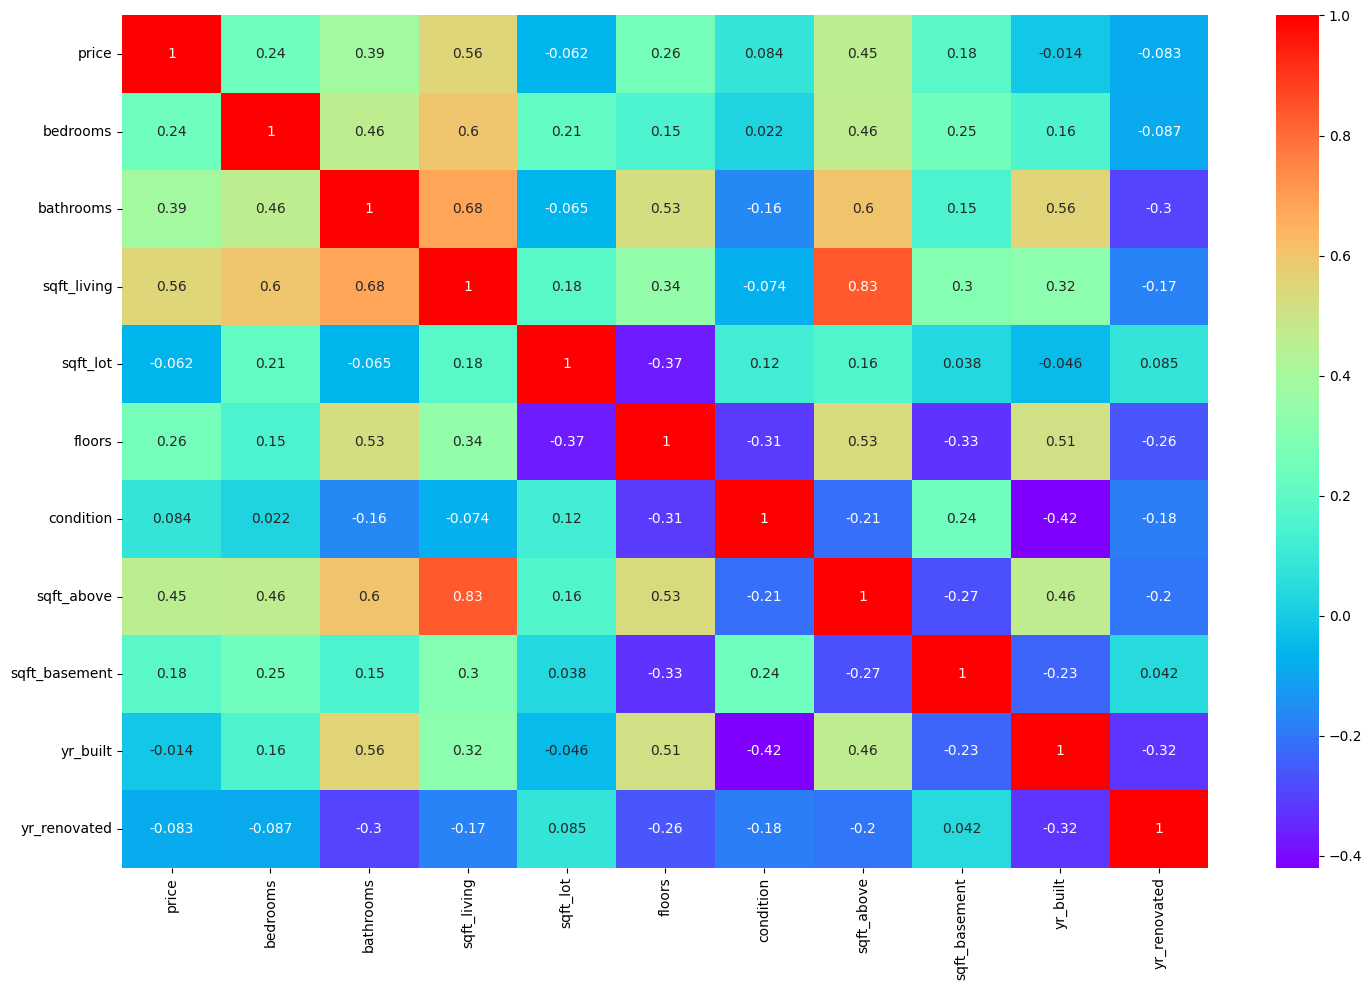

In [44]:
plt.figure(figsize=(15,10))
corr = numeric.corr()
sns.heatmap(corr , annot = True , cmap='rainbow')
plt.tight_layout()
plt.show()

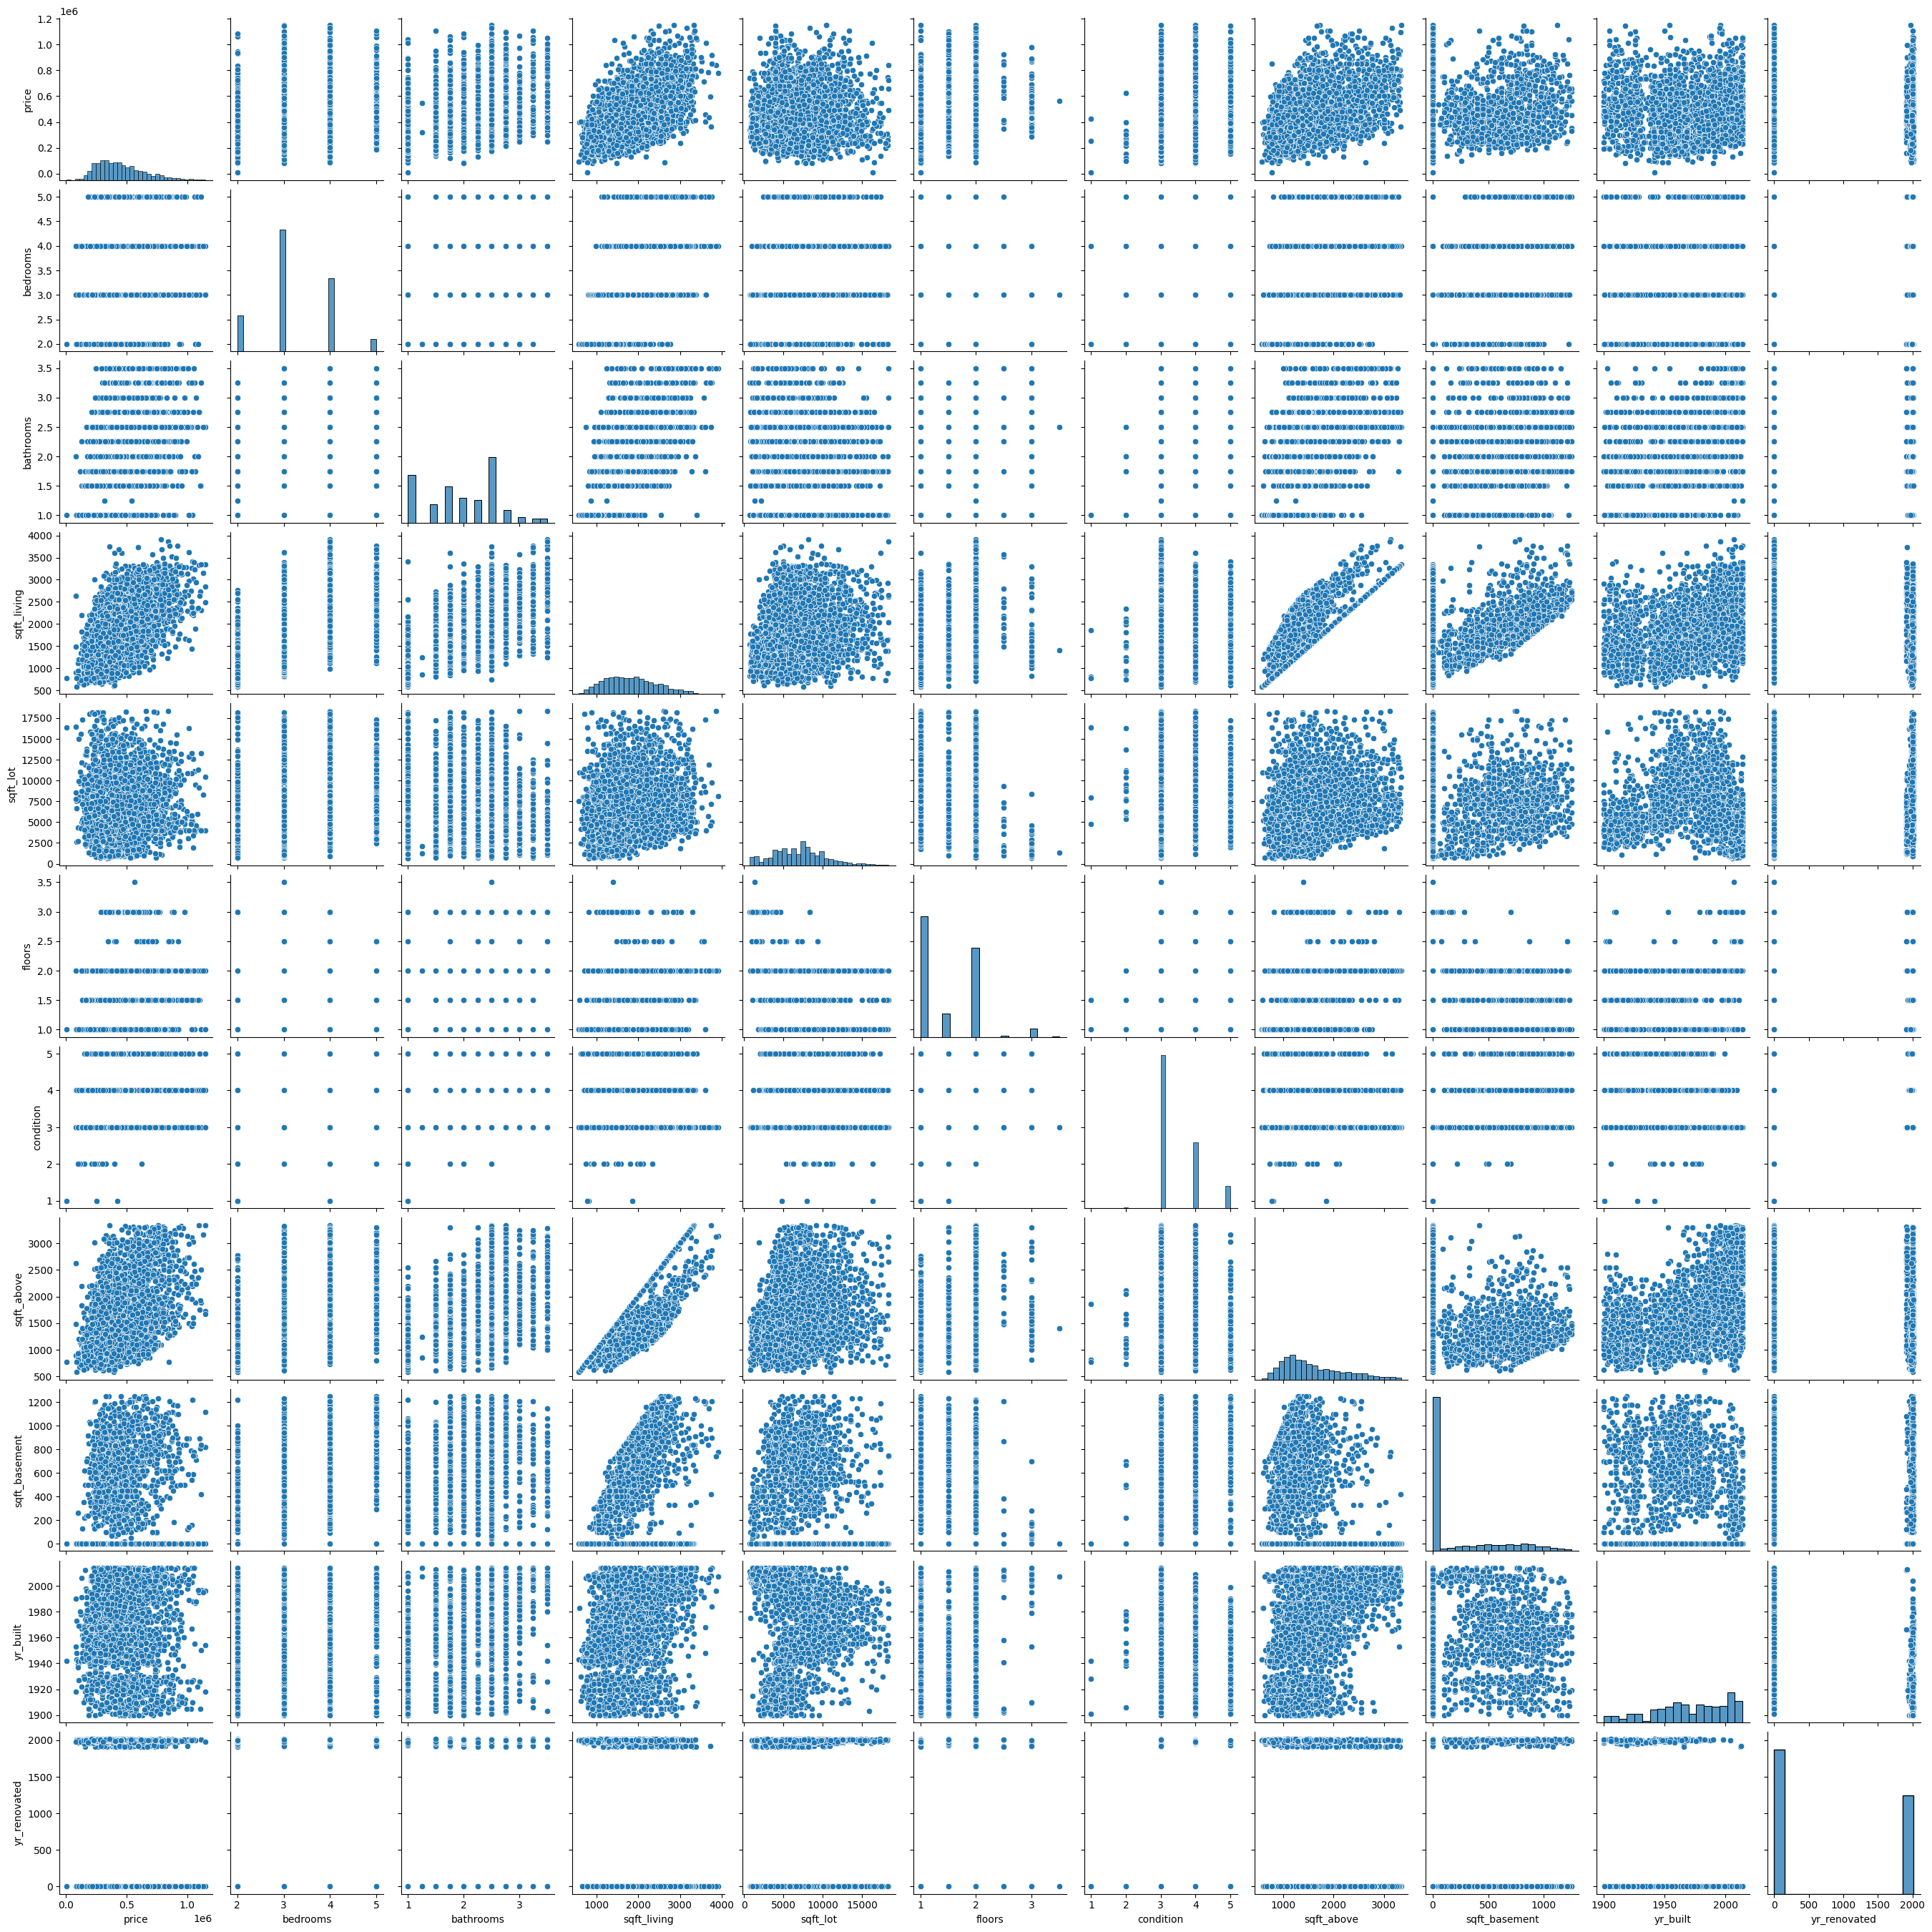

In [45]:
sns.pairplot(df)

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
cate_ = df.select_dtypes(exclude='number')
cate_

,date,street,city,statezip,country
0,2014-05-02,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2,2014-05-02,857 170th Pl NE,Bellevue,WA 98008,USA
3,2014-05-02,9105 170th Ave NE,Redmond,WA 98052,USA
4,2014-05-02,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...
3309,2014-07-09,501 N 143rd St,Seattle,WA 98133,USA
3310,2014-07-09,14855 SE 10th Pl,Bellevue,WA 98007,USA
3311,2014-07-09,759 Ilwaco Pl NE,Renton,WA 98059,USA
3312,2014-07-10,5148 S Creston St,Seattle,WA 98178,USA


In [13]:
df.street = df.street.str.lower()
df.city = df.city.str.lower()
df.statezip = df.statezip.str.lower()
df.country = df.country.str.lower()

In [14]:
le = LabelEncoder()
df.street = le.fit_transform(df.street)
df.city = le.fit_transform(df.city)
df.statezip = le.fit_transform(df.statezip)
df.country = le.fit_transform(df.country)

In [15]:
df.street = df.street.astype('category')
df.city = df.city.astype('category')
df.statezip = df.statezip.astype('category')
df.country = df.country.astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3292 entries, 0 to 3313
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3292 non-null   datetime64[ns]
 1   price          3292 non-null   int64         
 2   bedrooms       3292 non-null   float64       
 3   bathrooms      3292 non-null   float64       
 4   sqft_living    3292 non-null   int64         
 5   sqft_lot       3292 non-null   int64         
 6   floors         3292 non-null   float64       
 7   condition      3292 non-null   int64         
 8   sqft_above     3292 non-null   int64         
 9   sqft_basement  3292 non-null   int64         
 10  yr_built       3292 non-null   int64         
 11  yr_renovated   3292 non-null   int64         
 12  street         3292 non-null   category      
 13  city           3292 non-null   category      
 14  statezip       3292 non-null   category      
 15  country        3292 non-nu

In [17]:
df.price = np.log(df['price'])

In [18]:
X = df.drop(['yr_renovated','yr_built','sqft_lot','sqft_basement','date','price','country'], axis = 1)
y = df['price']

In [19]:
X_train , X_test ,y_train , y_test = train_test_split(X, y ,test_size= 0.2 ,random_state = 42 )

In [20]:
print(f'X_train{X_train.shape}')
print(f'y_train{y_train.shape}')
print(f'X_test{X_test.shape}')
print(f'y_test{y_test.shape}')


X_train(2633, 9)
y_train(2633,)
X_test(659, 9)
y_test(659,)


In [21]:
rf = RandomForestRegressor()
model = rf.fit(X_train , y_train)

In [22]:
pred_ = model.predict(X_test)

In [23]:
mse = mean_absolute_error(y_true= y_test , y_pred= pred_)
rmse = math.sqrt(mse)

r2 = r2_score(y_true= y_test , y_pred= pred_)

print(f'Mean_obsolute_error is {mse}')
print(f'Root_Mean_obsolute_error is {rmse}')
print(f'Acurracy Score is {r2}')

Mean_obsolute_error is 0.1490890835447264
Root_Mean_obsolute_error is 0.3861205557137905
Acurracy Score is 0.7867175499679419


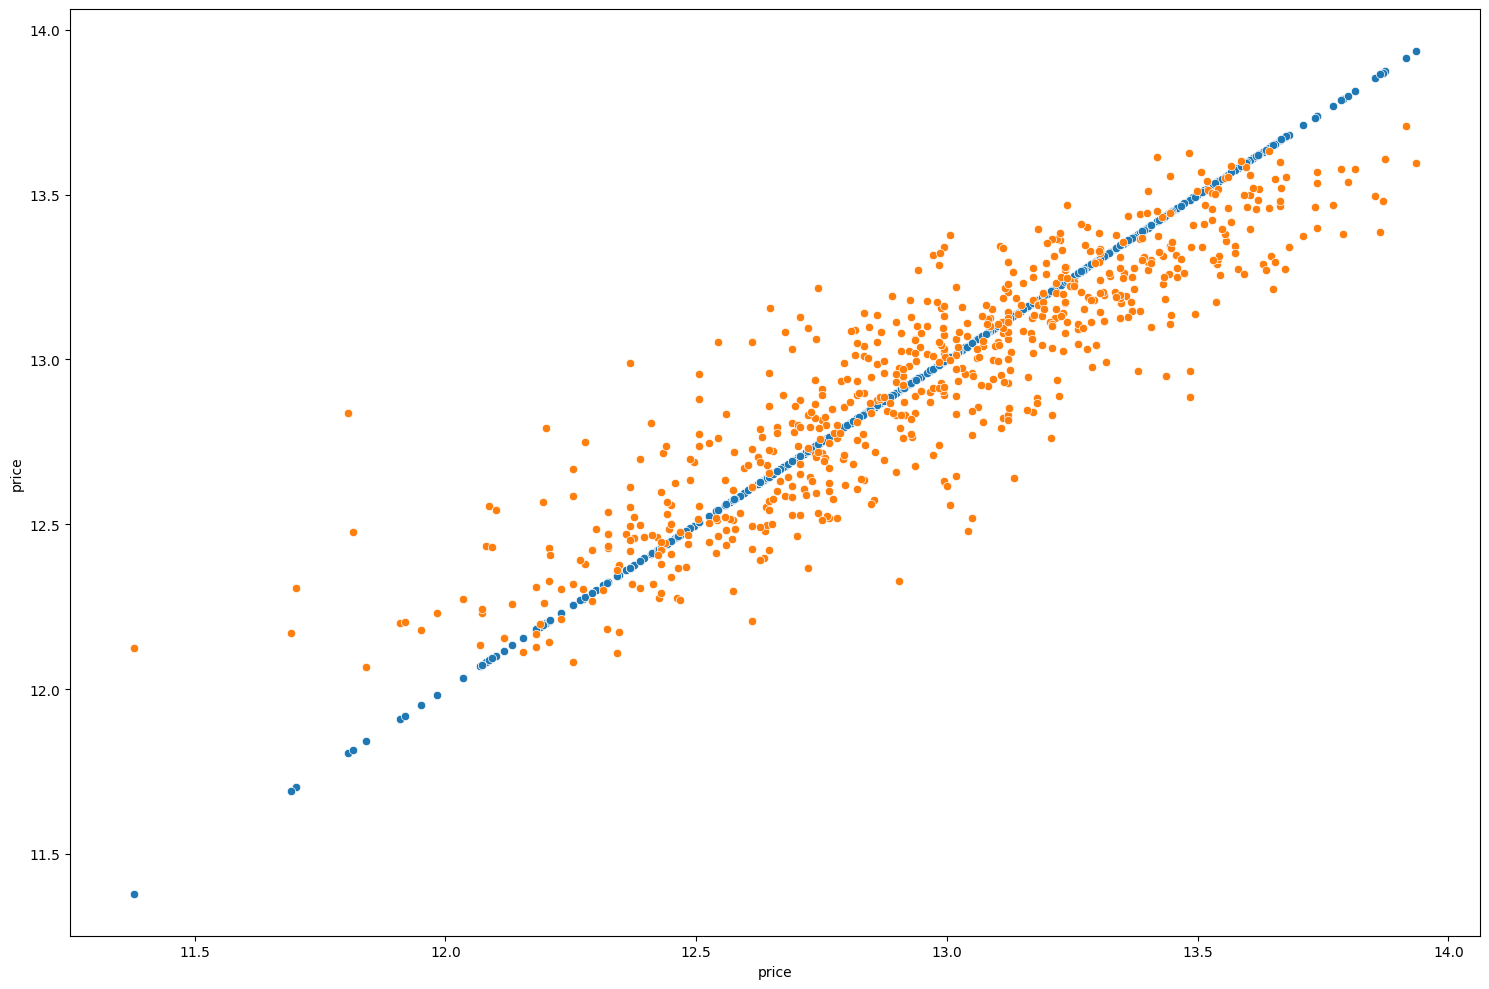

In [24]:
fig , ax = plt.subplots(figsize = (15,10))
sns.scatterplot(x = y_test , y = y_test , ax =ax)
sns.scatterplot(x = y_test , y = pred_ ,ax = ax)
plt.tight_layout()
plt.show()

In [100]:
model1 = RandomForestRegressor(n_estimators = 500 ,max_features = 3 ,max_samples =60 , oob_score = True)
rf1 = model1.fit(X_train , y_train)

In [101]:
pred1_ = model1.predict(X_test)

In [102]:
mse = mean_absolute_error(y_true= y_test , y_pred= pred1_)
rmse = math.sqrt(mse)

r2 = r2_score(y_true= y_test , y_pred= pred1_)

print(f'Mean_obsolute_error is {mse}')
print(f'Root_Mean_obsolute_error is {rmse}')
print(f'Acurracy Score is {r2}')

Mean_obsolute_error is 0.2495253753861082
Root_Mean_obsolute_error is 0.49952514990349406
Acurracy Score is 0.5018648719590153


In [110]:
X_train.tail(5)

,bedrooms,bathrooms,sqft_living,floors,condition,sqft_above,street,city,statezip
1095,3.0,2.00,1400,1.0,5,1400,75,14,2
1130,3.0,2.00,1480,1.0,4,750,2877,34,55
1294,3.0,1.75,1660,1.0,3,1380,1074,5,9
860,2.0,1.00,1400,1.0,3,900,1863,31,34
3180,4.0,2.25,1720,1.0,4,1720,1893,14,13


In [112]:
house = pd.DataFrame({
    'bedrooms': [3],
    'bathrooms': [2],
    'sqft_living': [1400],
    'floors': [1],
    'condition': [5],
    'sqft_above': [1400],
    'street': [75],
    'city': [14],
    'statezip': [2]
})

In [124]:
print(X.columns)
print(house.columns)


Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'sqft_above', 'street', 'city', 'statezip'],
      dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'sqft_above', 'street', 'city', 'statezip'],
      dtype='object')


In [125]:
predict3 = model.predict(house)

In [126]:
print(np.exp(predict3))

[246377.80899036]


In [25]:
# fig , ax = plt.subplots(figsize = (15,10))
# sns.scatterplot(x = y_test , y = y_test , ax =ax)
# sns.scatterplot(x = y_test , y = predict3 ,ax = ax)
# plt.tight_layout()
# plt.show()

In [26]:
import joblib
joblib.dump(model , filename= 'model/model.pkl')

['model/model.pkl']